In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

narsaq gl
hobart au
lasa cn
vaini to
nome us
nador ma
esperance au
hobart au
mataura pf
port elizabeth za
noumea nc
arraial do cabo br
kununurra au
aloleng ph
samarai pg
atuona pf
chokurdakh ru
carmo do rio claro br
mar del plata ar
mount gambier au
bluff nz
simao cn
ayan ru
naze jp
ust-uda ru
jaguarari br
ushuaia ar
seymchan ru
eskasem af
qaanaaq gl
bluff nz
vidim ru
busselton au
lasa cn
saskylakh ru
khatanga ru
bluff nz
jamestown sh
onega ru
brokopondo sr
punta arenas cl
ushuaia ar
palana ru
longlac ca
provideniya ru
chuy uy
kununurra au
butaritari ki
praia da vitoria pt
hobart au
mets parni am
beloha mg
butaritari ki
kaitangata nz
srednekolymsk ru
atuona pf
kapaa us
esperance au
belushya guba ru
ilulissat gl
harper lr
higuey do
gribanovskiy ru
busselton au
soma tr
puerto ayora ec
georgetown sh
umzimvubu za
yulara au
qaanaaq gl
punta arenas cl
rikitea pf
ostrovnoy ru
port elizabeth za
bambous virieux mu
cape town za
lebu cl
saint-pierre pm
koslan ru
albany au
punta arenas cl
saint-ph

champerico gt
new norfolk au
moree au
upernavik gl
vila vu
manicaragua cu
victoria sc
rikitea pf
kirakira sb
tommot ru
uwayl sd
souillac mu
dovers vc
hithadhoo mv
rikitea pf
socota co
ushuaia ar
illoqqortoormiut gl
cape town za
quelimane mz
ushuaia ar
talnakh ru
qaanaaq gl
jamestown sh
rikitea pf
sentyabrskiy ru
hasaki jp
smolensk ru
jamestown sh
barrow us
baculin ph
bambous virieux mu
kalga ru
puerto ayora ec
ushuaia ar
khatanga ru
kruisfontein za
agua prieta mx
nouadhibou mr
mrirt ma
saldanha za
yellowknife ca
hermanus za
lompoc us
haldia in
amderma ru
margate za
havre-saint-pierre ca
biak id
busselton au
kapaa us
orange au
paita pe
illoqqortoormiut gl
dakar sn
dikson ru
albany au
wewak pg
mount isa au
hithadhoo mv
airai pw
mataura pf
verkhoyansk ru
lagos ng
kapaa us
saldanha za
albany au
chapais ca
iqaluit ca
mpraeso gh
ushuaia ar
faanui pf
ventspils lv
ushuaia ar
kahului us
mudyuga ru
bluff nz
abnub eg
rikitea pf
barentsburg sj
albany au
geraldton au
sheridan us
nouadhibou mr
homer

grindavik is
thompson ca
bluff nz
tuktoyaktuk ca
mataura pf
vaini to
beringovskiy ru
hamilton bm
katha mm
kibala ao
labuan my
mackay au
faanui pf
atuona pf
east london za
krasnoselkup ru
sao filipe cv
arraial do cabo br
okato nz
tasiilaq gl
taolanaro mg
rikitea pf
qaanaaq gl
zabinka by
tecpan mx
nizhneyansk ru
grindavik is


In [9]:
# Import the datetime module from the datetime library.
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | narsaq
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | lasa
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | nome
Processing Record 6 of Set 1 | nador
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | noumea
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | kununurra
Processing Record 13 of Set 1 | aloleng
Processing Record 14 of Set 1 | samarai
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | carmo do rio claro
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | simao
Processing Record 22 of Set 1 | ayan
Processing Record 23 of Set 1 | naze
Processi

Processing Record 38 of Set 4 | airai
Processing Record 39 of Set 4 | bonavista
Processing Record 40 of Set 4 | torbay
Processing Record 41 of Set 4 | shuangyang
Processing Record 42 of Set 4 | alexandria
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | salalah
Processing Record 46 of Set 4 | kavaratti
Processing Record 47 of Set 4 | prince rupert
Processing Record 48 of Set 4 | yar-sale
Processing Record 49 of Set 4 | oxapampa
Processing Record 50 of Set 4 | hervey bay
Processing Record 1 of Set 5 | nuevitas
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | kegums
Processing Record 4 of Set 5 | marcona
City not found. Skipping...
Processing Record 5 of Set 5 | katherine
Processing Record 6 of Set 5 | mrirt
City not found. Skipping...
Processing Record 7 of Set 5 | benguela
Processing Record 8 of Set 5 | sao filipe
Processing Record 9 of Set 5 | necochea
Processing Record 10 of Set 5 | bilma
Processing 

Processing Record 31 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 32 of Set 8 | fairbanks
Processing Record 33 of Set 8 | oxbow
Processing Record 34 of Set 8 | ancud
Processing Record 35 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 36 of Set 8 | tabialan
City not found. Skipping...
Processing Record 37 of Set 8 | manambrag
City not found. Skipping...
Processing Record 38 of Set 8 | katsuura
Processing Record 39 of Set 8 | barcelos
Processing Record 40 of Set 8 | blonduos
City not found. Skipping...
Processing Record 41 of Set 8 | acari
Processing Record 42 of Set 8 | teguldet
Processing Record 43 of Set 8 | eureka
Processing Record 44 of Set 8 | charagua
Processing Record 45 of Set 8 | suluq
Processing Record 46 of Set 8 | dingle
Processing Record 47 of Set 8 | chuguyevka
Processing Record 48 of Set 8 | moree
Processing Record 49 of Set 8 | vila
Processing Record 50 of Set 8 | manicaragua
Processing Record 1 of Set 9 | kirakira
Processin

Processing Record 17 of Set 12 | americus
Processing Record 18 of Set 12 | samarinda
Processing Record 19 of Set 12 | oktyabrskiy
Processing Record 20 of Set 12 | baruun-urt
Processing Record 21 of Set 12 | espumoso
Processing Record 22 of Set 12 | senneterre
Processing Record 23 of Set 12 | neosho
Processing Record 24 of Set 12 | mizdah
Processing Record 25 of Set 12 | ankazobe
Processing Record 26 of Set 12 | mrakovo
Processing Record 27 of Set 12 | kropotkin
Processing Record 28 of Set 12 | cairns
Processing Record 29 of Set 12 | mugur-aksy
Processing Record 30 of Set 12 | vardo
Processing Record 31 of Set 12 | paramonga
Processing Record 32 of Set 12 | pampierstad
Processing Record 33 of Set 12 | lichtenburg
Processing Record 34 of Set 12 | joensuu
Processing Record 35 of Set 12 | kholodnyy
Processing Record 36 of Set 12 | pedernales
Processing Record 37 of Set 12 | camacha
Processing Record 38 of Set 12 | old road
City not found. Skipping...
Processing Record 39 of Set 12 | lappee

In [15]:
len(city_data) 

574

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narsaq,60.9167,-46.0500,50.22,98,100,10.92,GL,2021-06-24 02:05:19
1,Hobart,-42.8794,147.3294,58.26,75,20,3.00,AU,2021-06-24 02:05:19
2,Lasa,46.6166,10.7002,60.03,90,2,3.44,IT,2021-06-24 02:05:20
3,Vaini,-21.2000,-175.2000,69.96,88,90,5.75,TO,2021-06-24 02:05:20
4,Nome,64.5011,-165.4064,66.27,63,40,11.50,US,2021-06-24 02:05:20
5,Nador,35.1740,-2.9287,66.45,88,40,0.00,MA,2021-06-24 02:05:21
6,Esperance,-33.8667,121.9000,57.09,66,96,12.39,AU,2021-06-24 02:05:21
7,Mataura,-46.1927,168.8643,52.48,70,100,6.24,NZ,2021-06-24 02:05:21
8,Port Elizabeth,-33.9180,25.5701,56.10,80,100,8.81,ZA,2021-06-24 02:05:22
9,Noumea,-22.2763,166.4572,76.98,99,43,16.35,NC,2021-06-24 02:05:22


In [26]:
# Reorder columns
new_column_order=["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2021-06-24 02:05:19,60.9167,-46.0500,50.22,98,100,10.92
1,Hobart,AU,2021-06-24 02:05:19,-42.8794,147.3294,58.26,75,20,3.00
2,Lasa,IT,2021-06-24 02:05:20,46.6166,10.7002,60.03,90,2,3.44
3,Vaini,TO,2021-06-24 02:05:20,-21.2000,-175.2000,69.96,88,90,5.75
4,Nome,US,2021-06-24 02:05:20,64.5011,-165.4064,66.27,63,40,11.50
5,Nador,MA,2021-06-24 02:05:21,35.1740,-2.9287,66.45,88,40,0.00
6,Esperance,AU,2021-06-24 02:05:21,-33.8667,121.9000,57.09,66,96,12.39
7,Mataura,NZ,2021-06-24 02:05:21,-46.1927,168.8643,52.48,70,100,6.24
8,Port Elizabeth,ZA,2021-06-24 02:05:22,-33.9180,25.5701,56.10,80,100,8.81
9,Noumea,NC,2021-06-24 02:05:22,-22.2763,166.4572,76.98,99,43,16.35


In [27]:
# Create the output file (CSV)
output_data_file= "weather_data/cities.csv"
#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label= "City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

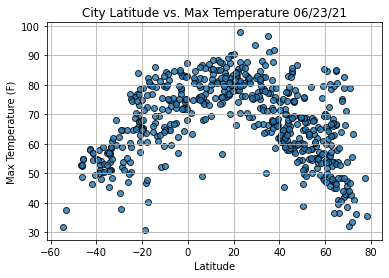

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

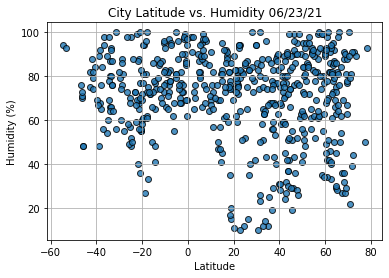

In [34]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

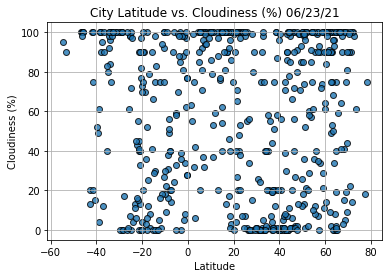

In [35]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

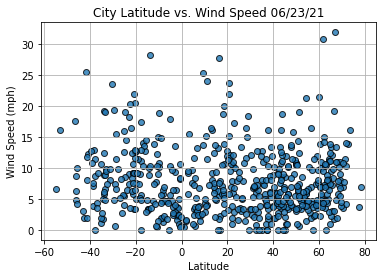

In [36]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()